In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

sns.set_style("darkgrid")

### Linear Regression

Regressão linear é o processo de ajustar uma linhas aos pontos de treino a fim de diminuir a distância desses pontos à linha.

$$\Large{y' = h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3}$$ onde $x_0$ = 1

Existe a `cost function` que sumariza o erro da hipótese.

$$\Large{J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}}$$

Para ajustar a hipótese da melhor forma possível, preciso identificar qual a hipótese que me traz o menor valor para a cost function.

#### Gradient Descent
Uma das formas de conseguir os parâmetros da hipótese onde a cost function é mínima.
Existem várias outras funções que tentar calcular os parâmetros da hipótese onde a `cost function` é mínima.

**repetir até convergência {** 

$\normalsize{\theta_j := \theta_j - \alpha \frac{\delta}{\delta \theta_j}J(\theta_0, \theta_1)}$  
  
**}** para j = 0 e j = 1

**repetir até convergência {** 

$\normalsize{\theta_0 := \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})}$

$\normalsize{\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_1^{(i)}) - y^{(i)}) x_1^{(i)}}$

$\normalsize{\theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_2^{(i)}) - y^{(i)}) x_2^{(i)}}$

$\normalsize{\theta_3 := \theta_3 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x_3^{(i)}) - y^{(i)}) x_3^{(i)}}$
  
**}**


O **alpha** representa o **learning rate**.
- Se alpha é muito baixo: convergência lenta
- Se alpha é muito alto: convergência pode nunca chegar

### Regressão Linear para 1 Váriavel

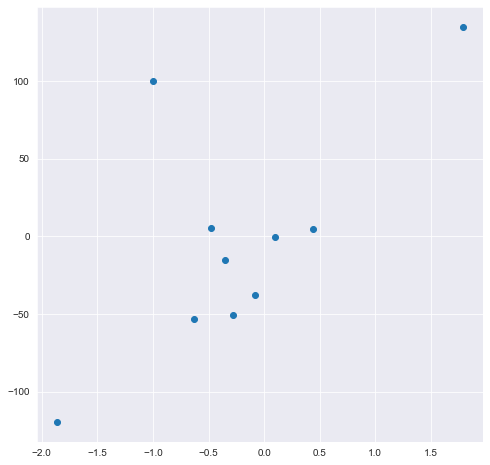

In [170]:
data = datasets.make_regression(
    n_samples=10, 
    n_features=1, 
    n_informative=1, 
    n_targets=1, 
    noise=20,
    random_state=3
)

df = pd.DataFrame({"x": data[0].flatten(), "y": data[1].tolist()})
df.sample(3)

df.loc[9, :] = [-1, 100]

plt.figure(figsize=(8, 8))

plt.scatter(df["x"], df["y"]);

In [171]:
lr = LinearRegression()

X = np.reshape(np.array(df.x), (df.shape[0], 1))
y = df.y

lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
lr.score(X, y)

0.42077142598642703

In [173]:
Xplot = np.array([
    [-2],
    [2]
])

yplot = lr.predict(Xplot)

Xplot, yplot

(array([[-2],
        [ 2]]), array([-92.47316061, 109.8882757 ]))

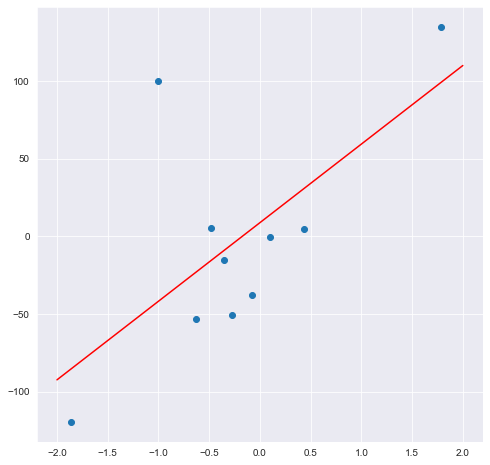

In [174]:
plt.figure(figsize=(8, 8))

plt.scatter(df["x"], df["y"])
plt.plot(Xplot.flatten(), yplot, color="red");

### Regressão Linear para Múltiplas Váriaveis

In [124]:
data = datasets.load_diabetes()

print(data["DESCR"])

diabetes = pd.DataFrame(data=np.c_[data["data"], data["target"]], columns=data["feature_names"] + ["target"])
diabetes.head()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [127]:
lr2 = LinearRegression()

X = data["data"]
y = data["target"]

lr2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
diabetes.sample()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
59,0.063504,0.05068,-0.025607,0.011544,0.064477,0.048477,0.030232,-0.002592,0.038393,0.019633,170.0


In [149]:
X_to_predict = np.array([
    [0.063504, 0.05068, -0.025607, 0.011544, 0.064477, 0.048477, 0.030232, -0.002592, 0.038393, 0.019633]
])

lr2.predict(X_to_predict)

array([134.57779886])

In [151]:
lr2.score(X, y)

0.5177494254132934